Fashion mnist - CNN

In [11]:
import numpy as np
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.preprocessing import image


데이터 불러오기

In [12]:
from tensorflow.keras.datasets.fashion_mnist import load_data

In [13]:
fashion = load_data()

Train, test 분리

In [26]:
(x_train, y_train), (x_test, y_test) = fashion

In [15]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

One hot encoding

In [22]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [23]:
x_train = tf.constant(x_train)

In [38]:
x_train = x_train.reshape( -1, 28, 28,1)

In [16]:
y_trainONE = to_categorical(y_train)
y_testONE = to_categorical(y_test)

CNN modeling

In [39]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), strides=1, input_shape=(28,28,1), # fashion mnist data --> greyscale
                 activation='relu', padding='same')) # default padding - None (valid) --> True (same)
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size = (2,2))) #가장 큰 값 출력?
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax')) #마지막은 분류갯수
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(x_train, y_trainONE, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 3ms/step - loss: 0.6492 - acc: 0.8569
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2651 - acc: 0.9044
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2228 - acc: 0.9187
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1906 - acc: 0.9281
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1639 - acc: 0.9391
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1415 - acc: 0.9475
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1226 - acc: 0.9547
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1079 - acc: 0.9600
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0945 - acc: 0.9657
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0805 - acc: 0.9697


Confusion maxtrix

In [43]:
CM_train = confusion_matrix(y_train, model.predict( x_train.reshape(-1,28,28,1)).argmax(axis=1))

Text(33.0, 0.5, 'Real')

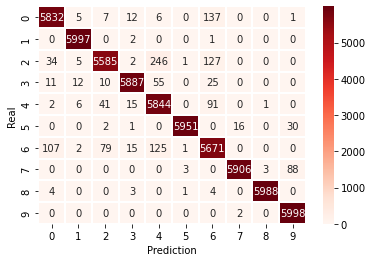

In [47]:
sns.heatmap(CM_train,
            annot=True,
            cmap='Reds',
            fmt = 'd',
            linewidths=0.25
           )
plt.xlabel('Prediction')
plt.ylabel('Real')

In [45]:
CM_test = confusion_matrix(y_test, model.predict(x_test.reshape(-1,28,28,1)).argmax(axis=1))

Text(33.0, 0.5, 'Real')

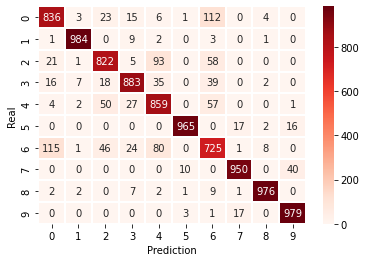

In [46]:
sns.heatmap(CM_test,
            annot=True,
            cmap='Reds',
            fmt = 'd',
            linewidths=0.25
           )
plt.xlabel('Prediction')
plt.ylabel('Real')